In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
from numpy import linalg    
import matplotlib.pyplot as plt
from functools import partial
from scipy.misc import derivative
import itertools
import math

In [2]:
# For interactive plots
%matplotlib widget

# Task 1

## Lagrange polynomial

In [3]:
def find_lj (xs: np.array, x: float, j: int):
    assert len(xs) >= 2, "invalid number of points"
    assert j >= 0 and j < len(xs), "invalid index"
    res = 1.0
    for m in range(0, len(xs)):
        if (j != m):
            res *= (x - xs[m])/(xs[j] - xs[m])
    return res

def lagrange(xs: np.array, ys: np.array, x: float):
    assert len(xs) >= 2 and len(ys) >= 2, "invalid number of points"
    assert len(xs) == len(ys), "invalid number of points"
    res = 0.0
    for j in range(0, len(xs)):
        res += ys[j]* find_lj(xs, x, j)
    return res

In [4]:
def f(x):
    return 1/(1 + 25*x**2)
Xs = np.linspace(-1, 1, 500)
fs = f(Xs)

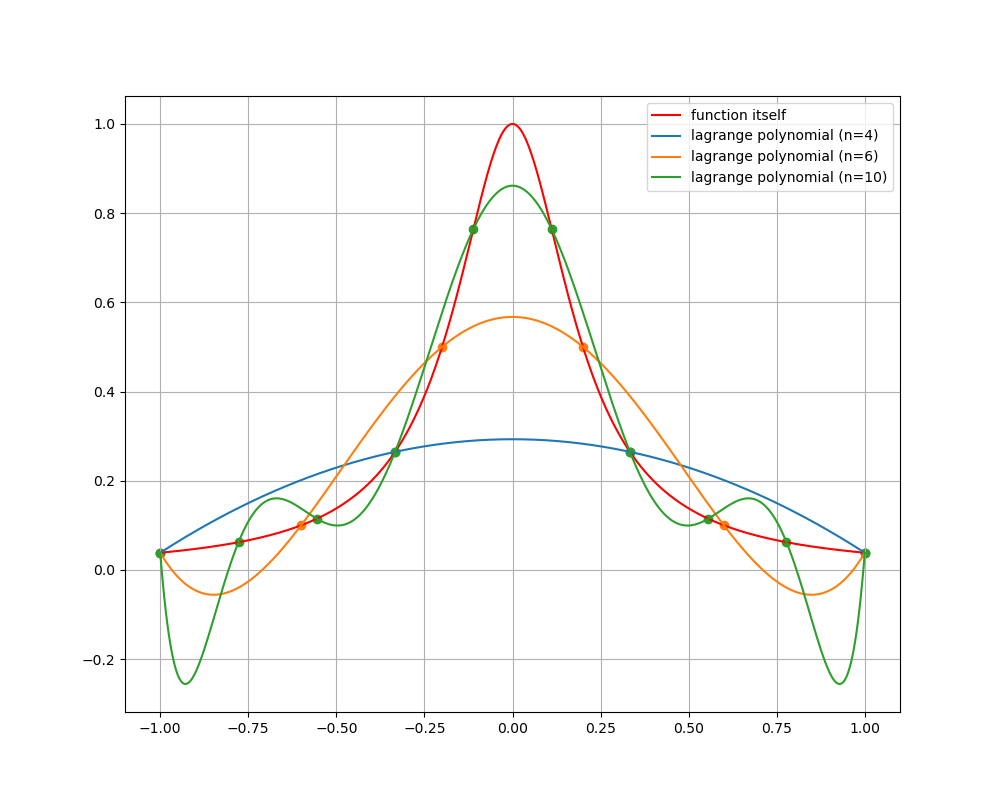

In [5]:
plt.figure(figsize=[10,8])
plt.plot(Xs, fs, label="function itself", color="red")

n = 4
xs = np.linspace(-1, 1, n)
ys = f(xs)
ps = np.array([lagrange(xs, ys, x) for x in Xs])
plt.scatter(xs, ys)
plt.plot(Xs, ps, label=f"lagrange polynomial (n={n})")

n = 6
xs = np.linspace(-1, 1, n)
ys = f(xs)
ps = np.array([lagrange(xs, ys, x) for x in Xs])
plt.scatter(xs, ys)
plt.plot(Xs, ps, label=f"lagrange polynomial (n={n})")

n = 10
xs = np.linspace(-1, 1, n)
ys = f(xs)
ps = np.array([lagrange(xs, ys, x) for x in Xs])
plt.scatter(xs, ys)
plt.plot(Xs, ps, label=f"lagrange polynomial (n={n})")
plt.legend()
plt.grid()

## Newton polynomial

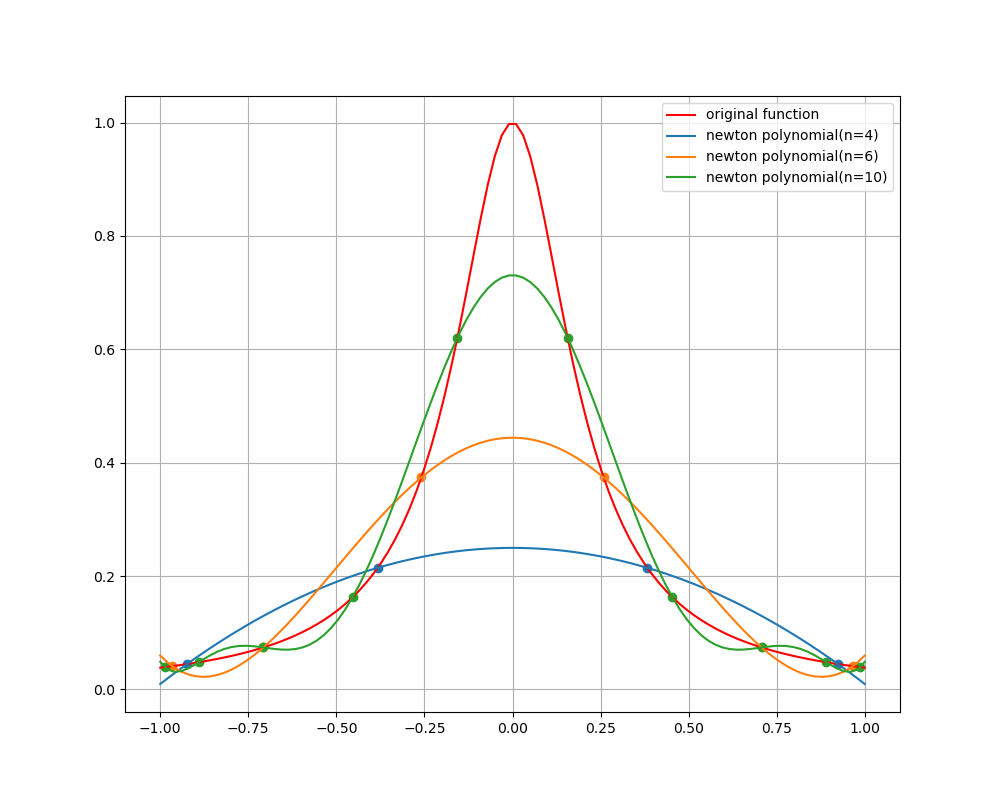

In [6]:
def find_dkn(xs: np.array, ys: np.array, k: int, n: int) -> float:
    #assert len(xs) == len(ys), "invalid number of points"
    if (k==n):
        return ys[0]
    d1 = find_dkn(xs, ys[:-1], k, n-1)
    d2 = find_dkn(xs, ys[1:], k+1, n)
    t1 = xs[k]
    t2 = xs[n]
    return (d2 - d1)/(t2 - t1)

def newton_polynomial(xs: np.array, ys: np.array) -> np.array:
    assert len(xs) == len(ys), "invalid number of points"
    return np.array([find_dkn(xs, ys, 0, k) for k in range(len(xs))])

def newton_polynomial_value(xs: np.array, coefs: np.array, x: float) -> float:
    assert len(xs) == len(ys), "invalid number of points"
    res = 0
    n = len(xs)
    for i in range(n):
        m = 1.0
        for j in range(i):
            m *= x - xs[j]
        res += m * coefs[i]
    return res

def get_interpolation_points(a : float, b : float, n : int) -> np.array:
    points = []
    m = (a + b) / 2.0
    d = (b - a) / 2.0
    return np.array([m + d * np.cos((2*i - 1) * np.pi / (2*n)) for i in range(1, n+1)])

a, b = -1, 1
xs = np.linspace(a, b, 100)
fs = f(xs)

plt.figure(figsize=[10, 8])
plt.plot(xs, fs, color="red", label="original function")

n = 4
points = get_interpolation_points(a, b, n)
ys = f(points)
pol = newton_polynomial(points, ys)
ps = newton_polynomial_value(points, pol, xs)
plt.scatter(points, ys)
plt.plot(xs, ps, label=f"newton polynomial(n={n})")

n = 6
points = get_interpolation_points(a, b, n)
ys = f(points)
pol = newton_polynomial(points, ys)
ps = newton_polynomial_value(points, pol, xs)
plt.scatter(points, ys)
plt.plot(xs, ps, label=f"newton polynomial(n={n})")

n = 10
points = get_interpolation_points(a, b, n)
ys = f(points)
pol = newton_polynomial(points, ys)
ps = newton_polynomial_value(points, pol, xs)
plt.scatter(points, ys)
plt.plot(xs, ps, label=f"newton polynomial(n={n})")

plt.legend()
plt.grid()

# Task 2

In [7]:
def f(x: float) -> float:
    return (np.log(100 - x))/(10 - np.sqrt(x))

In [8]:
def get_legendre_poly(n: int) -> np.array:
    assert n > 0, "Invalid order of Legendre polynomial"
    poly_x_sq_minus_one = np.array([1.0, 0, -1.0])
    poly_to_power = np.polynomial.polynomial.polypow(poly_x_sq_minus_one, n)
    poly_der = np.polyder(poly_to_power, n)
    return poly_der / (math.factorial(n) * 2.0 ** n)

def get_legendre_poly_zeros_predictions(n: int) -> np.array:
    # http://naturalunits.blogspot.com/2013/10/zeros-of-legendre-polynomials.html
    def get_theta_n_k (k: int):
        return np.pi * (n - k + 0.75) / (n + 0.5)
    def get_xk(k: int):
        return (1.0 - 1 / (8.0 * n ** 2.0) + 1 / (8.0 * n ** 3.0) - 1 / (384.0 * n ** 4.0) * (39.0 - 28.0 / (np.sin(get_theta_n_k(k)) ** 2.0))) * np.cos(get_theta_n_k(k))
    return np.sort(np.array([get_xk(k) for k in range(1, n + 1)]))

In [9]:
def newton_solve(x, f, der, eps: float = 1e-7, max_iter: int = 100000) -> np.array:
    for i in range(max_iter):
        delta = f(x) / der(x)
        x -= delta
        if abs(delta) < eps:
            return x
    raise RuntimeWarning(
        "Newton's method does not converge or is slowly converging")

In [10]:
def get_legendre_zeros(n: int, eps: float = 1e-7, max_iter: int = 100000) -> np.array:
    poly = get_legendre_poly(n)
    polyder = np.polyder(poly)
    xs = get_legendre_poly_zeros_predictions(n)
    def func (x: float):
        return np.polyval(poly, x)
    def func_der(x: float):
        return np.polyval(polyder, x)
    return np.array([newton_solve(x, func, func_der, eps=eps, max_iter=max_iter) for x in xs])

In [11]:
def integrate_simpson(func, a: float, b: float, n: int) -> float:
    assert a <= b, "invalid bounds" 
    assert n > 0, "invalid order" 
    h = (b - a) / float(n)
    result = 0.0
    for i in range(0, n, 2):
        x_i = a + i * h
        x_j = x_i + h
        x_k = x_j + h
        f_i = func(x_i)
        f_j = func(x_j)
        f_k = func(x_k)
        result += (f_i + 4.0 * f_j + f_k)
    return (result / 3.0) * h

In [12]:
 def get_lagrange_base_poly(k: int, n: int, get_xi) -> np.array:
    assert n > 0, "invalid order"
    div = 1.0
    poly = np.array([1.0])
    for i in range(n):
        if (k == i):
            continue
        div *= (get_xi(k) - get_xi(i))
        poly = np.polymul(poly, np.array([1.0, -get_xi(i)]))
    return poly / div

In [13]:
def get_gauss_weights(n: int, eps: float = 1e-7) -> np.array:
    a, b = -1.0, 1.0
    points = get_legendre_zeros(n, eps = eps)
    get_xi = lambda i: points[i]
    def get_weight_k(k: int):
        poly = get_lagrange_base_poly(k, n, get_xi)
        f = lambda x: np.polyval(poly, x)
        num_points = 10000
        return integrate_simpson(f, a, b, num_points)
    return np.array([get_weight_k(k) for k in range(n)])

In [14]:
def integrate_gauss(f, a: float, b: float, n: int, eps = 1e-9):
    assert n > 0, "invalid order"
    assert a <= b, "invalid bounds" 
    weights = get_gauss_weights(n)
    points = get_legendre_zeros(n, eps = eps)
    f_changed = lambda x: f((b - a) / 2.0 * x + (b + a) / 2.0)
    res = (b - a) / 2.0 * sum((w * f_changed(point) for w, point in zip(weights, points)))
    return res

Gaussian quadrature result: 5.817685349884552
scipy's Gaussian quadrature: 5.816001553474594 +- 8.479294066887633e-08


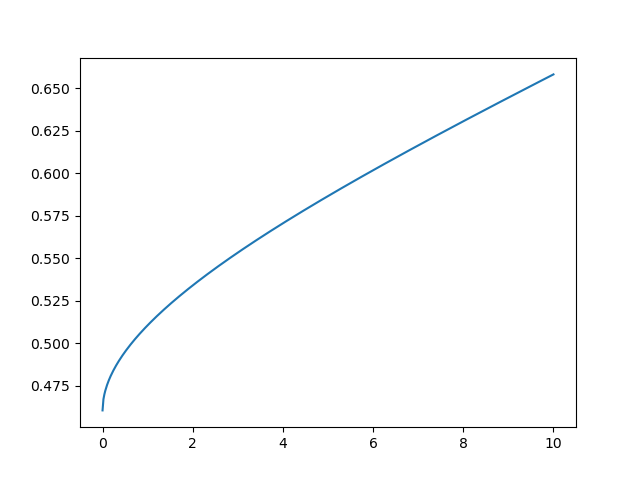

In [15]:
a = 0.0
b = 10.0
val = integrate_gauss(f, a, b, 4)
print(f"Gaussian quadrature result: {val}")
sp_res = sp.integrate.quadrature(f, a, b)
print(f"scipy's Gaussian quadrature: {sp_res[0]} +- {sp_res[1]}")

plt.figure()
xs = np.linspace(a, b, 500)
ys = f(xs)
plt.plot(xs, ys)

In [21]:
errs = []
ns = []
for n in range(2, 10):
    val = integrate_gauss(f, a, b, n)
    sp_res = sp.integrate.quadrature(f, a, b)
    errs.append(np.abs(sp_res[0] - val))
    ns.append(n)

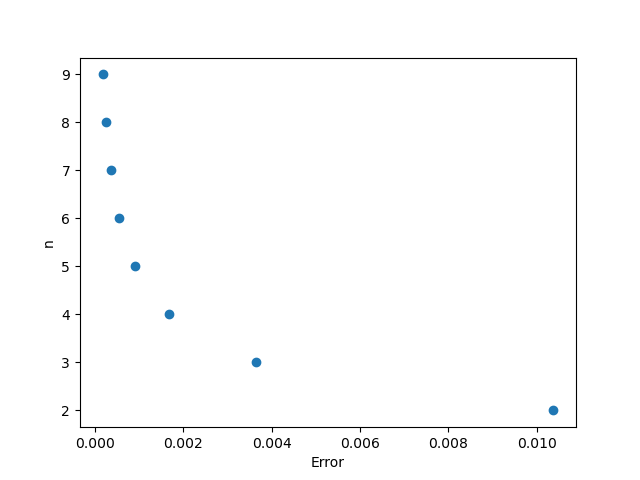

In [22]:
plt.figure()
plt.xlabel("Error")
plt.ylabel("n")
plt.scatter(errs, ns)

# Task 3

In [ ]:
def integrate_simple(function, a: float, b: float, points_n: int) -> float:
    assert a <= b, "invalid bounds"
    step = (b - a) / points_n
    res = 0.5 * (function(a) + function(b))
    x_i = a + step
    for i in range(0, points_n):
        x_i += step
        res += function(x_i)
    return res * step

In [ ]:
def interpolation (function, a: float, b:float, x: float):
    assert a <= b, "invalid bounds"
    m = (a + b) / 2
    return function(a) *((x-m)*(x-b))/((a-m)*(a-b)) + function(m) *((x-a)*(x-b))/((m-a)*(m-b)) + function(b) *((x-a)*(x-m))/((b-m)*(b-a))

In [ ]:
def f(x: float) -> float: 
    return np.sin(100.0 * x) * np.exp(-x ** 2.0) * np.cos(2.0 * x)

In [ ]:
a1 = 0.0
b1 = 3.0
n1 = 10000

In [ ]:
xs = np.linspace(a1, b1, 600)
fs = f(xs)
ps = interpolation(f, a1, b1, xs)
plt.figure(figsize=[12,7])
plt.plot(xs, fs)
plt.plot(xs, ps)

In [ ]:
v1_trap = integrate_simple(f, a1, b1, n1)
v1_simp = integrate_simpson(f, a1, b1, n1)

In [ ]:
print(f'trap: {v1_trap}')
print(f'simp: {v1_simp}')
print(f'|simp- trap|: {abs(v1_simp - v1_trap)}')

## Task 2

In [ ]:
eps2_tail = 1e-4 # Tail cotoff precision
eps2_int = 1e-4 # Integral calc precision

In [ ]:
# |cos(x)| / (2 + x^2) <= 1 / (2 + x^2)
# Int[1 / (2 + x^2)] = arctan(x / sqrt(2)) / sqrt(2)
# Tail = arctan(x / sqrt(2)) / sqrt(2) | cutoff -> +inf
# eps2_tail = [np.pi / 2 - arctan(cutoff / sqrt(2))] / sqrt(2)
# np.pi / 2 - sqrt(2) * eps2_tail = arctan(cutoff / sqrt(2))
cutoff = np.sqrt(2.0) * np.tan(np.pi / 2.0 - np.sqrt(2.0) * eps2_tail)

In [ ]:
a2 = 0.0
b2 = cutoff

In [ ]:
def f_2(x: float) -> float: 
    return np.cos(x) / (2.0 + x ** 2.0)

In [ ]:
# https://www.wolframalpha.com/input?i=second+derivative+cos%28x%29+%2F+%282+%2B+x%5E2%29
f2_second_der_max_abs = 1.0

# eps2_int >= (b - a) / 8.0 * f2_second_der_max_abs * ((b - a) / n) ** 2.0 
# 8.0 * eps2_int / ((b - a) ** 3.0 * f2_second_der_max_abs) >= n ** -2.0
n2 = int((8.0 * eps2_int / ((b2 - a2) ** 3.0 * f2_second_der_max_abs)) ** (-0.5))
h2 = (b2 - a2) / float(n2)

In [ ]:
# https://www.wolframalpha.com/input?i=integrate+from+0+to+inf+cos%28x%29+%2F+%282+%2B+x%5E2%29
v2_exact = np.exp(-np.sqrt(2.0)) * np.pi / (2.0 * np.sqrt(2.0))

In [ ]:
v2_trap = integrate_simple(f_2, 0, cutoff, int(n2))

In [ ]:
print(f'h2 = {h2}')
print(f'v2_trap = {v2_trap}')
print(f'v2_exact = {v2_exact}')
print(f'|exact - trap|: {abs(v2_trap - v2_exact)}')

## Task 3

In [ ]:
a3 = 0.0
b3 = 10.
0
n3 = 100000

In [ ]:
def by_part(x: float) -> float:
    return 2.0 * np.sqrt(x) * np.sin(x)


def f3(x: float) -> float:
    return 2.0 * np.sqrt(x) * np.cos(x)

In [ ]:
# Int_0_10[sin(x) / sqrt(x)] = [2 * sqrt(x) * sin(x)]_0_10 - # Int_0_10[2 * sqrt(x) * cos(x)]
v3_trap = (by_part(10.0) - by_part(0.0)) - integrate_simple(f3, a3, b3, n3)

In [ ]:
# https://www.wolframalpha.com/input?i=integrate+from+0+to+10+sin%28x%29+%2F+sqrt%28x%29
print(f'v3_trap: {v3_trap}')